In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import confusion_matrix

# Dataset

The dataset consists of 36 clinical and biological features of 265 Caucasians who were diagnoised with Chronic Lymphocytic Leukemia

In [2]:
def load_csv():
    """
    :return: a dataframe containing our X and Y values
    """
    all_data = pd.read_excel('ALL_data.xlsx', index_col=0)
#     del aml_data['DrawID']
#     aml_data['caseflag'].replace({'Yes': 1, 'No': -1}, inplace=True)
#     return aml_data
    return all_data


In [3]:
all_data = load_csv()

In [4]:
all_data

,Diagnosis date,Record date,Exitus date,TLC,T8C,NCC,MBC,CD38,AGE,SEX,...,ALB,IgG,IgA,IgM,B2M,ZAP_70,MP,Ctx,AID,Exitus
ID,,,,,,,,,,,,,,,,,,,,,
1,2003-05-04,2008-08-01,NaT,1138.40,NaN,1280.7,11810.90,2.0,62,1,...,41.0,7.79,1.92,1.24,1.06,NaN,1.0,2.0,2.0,NaN
2,2002-11-02,2009-04-20,NaT,1562.50,312.50,937.5,3750.00,2.0,81,1,...,41.0,11.90,1.71,0.49,3.18,NaN,1.0,1.0,2.0,NaN
3,1997-02-24,2009-07-21,NaT,2717.00,1235.00,247.0,21736.00,2.0,50,1,...,43.0,9.46,1.32,0.49,2.00,0.27,2.0,1.0,2.0,NaN
4,2004-03-02,2009-05-05,NaT,2091.00,NaN,2509.2,16309.80,NaN,74,2,...,34.0,11.30,2.31,2.13,4.84,NaN,1.0,1.0,2.0,NaN
5,2006-12-04,2009-04-02,NaT,2175.60,777.00,932.4,27972.00,2.0,86,1,...,42.8,7.00,0.65,0.20,5.36,1.20,2.0,2.0,2.0,NaN
6,1996-02-07,2009-06-09,NaT,2708.10,802.40,401.2,6920.70,2.0,72,2,...,36.8,9.48,7.43,1.07,3.32,1.20,1.0,2.0,2.0,NaN
7,2005-04-01,2009-06-09,NaT,4516.20,1389.60,694.8,6369.00,2.0,42,1,...,34.3,7.74,1.44,0.77,2.05,3.00,1.0,1.0,2.0,NaN
8,1999-06-19,2009-05-07,NaT,2070.00,NaN,1380.0,8050.00,NaN,67,1,...,35.0,11.40,2.21,0.77,2.80,NaN,1.0,2.0,2.0,NaN
9,2007-04-13,2009-04-18,NaT,1464.00,854.00,488.0,22448.00,2.0,75,1,...,36.8,5.62,0.99,0.77,2.86,0.51,1.0,1.0,2.0,NaN


In [5]:
#all_data[all_data['Diagnosis date'].notnull() & (all_data['Record date'].notnull())]
idx= all_data[(all_data['Exitus'].isna())]
# df_test['Difference'] = df_test['Difference'] / np.timedelta64(1, 'D')

In [6]:
idx['Difference'] = (idx['Record date'] - idx['Diagnosis date'])

C:\Users\pratik\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [7]:
idx

,Diagnosis date,Record date,Exitus date,TLC,T8C,NCC,MBC,CD38,AGE,SEX,...,IgG,IgA,IgM,B2M,ZAP_70,MP,Ctx,AID,Exitus,Difference
ID,,,,,,,,,,,,,,,,,,,,,
1,2003-05-04,2008-08-01,NaT,1138.40,NaN,1280.7,11810.90,2.0,62,1,...,7.79,1.92,1.24,1.06,NaN,1.0,2.0,2.0,NaN,1916 days
2,2002-11-02,2009-04-20,NaT,1562.50,312.50,937.5,3750.00,2.0,81,1,...,11.90,1.71,0.49,3.18,NaN,1.0,1.0,2.0,NaN,2361 days
3,1997-02-24,2009-07-21,NaT,2717.00,1235.00,247.0,21736.00,2.0,50,1,...,9.46,1.32,0.49,2.00,0.27,2.0,1.0,2.0,NaN,4530 days
4,2004-03-02,2009-05-05,NaT,2091.00,NaN,2509.2,16309.80,NaN,74,2,...,11.30,2.31,2.13,4.84,NaN,1.0,1.0,2.0,NaN,1890 days
5,2006-12-04,2009-04-02,NaT,2175.60,777.00,932.4,27972.00,2.0,86,1,...,7.00,0.65,0.20,5.36,1.20,2.0,2.0,2.0,NaN,850 days
6,1996-02-07,2009-06-09,NaT,2708.10,802.40,401.2,6920.70,2.0,72,2,...,9.48,7.43,1.07,3.32,1.20,1.0,2.0,2.0,NaN,4871 days
7,2005-04-01,2009-06-09,NaT,4516.20,1389.60,694.8,6369.00,2.0,42,1,...,7.74,1.44,0.77,2.05,3.00,1.0,1.0,2.0,NaN,1530 days
8,1999-06-19,2009-05-07,NaT,2070.00,NaN,1380.0,8050.00,NaN,67,1,...,11.40,2.21,0.77,2.80,NaN,1.0,2.0,2.0,NaN,3610 days
9,2007-04-13,2009-04-18,NaT,1464.00,854.00,488.0,22448.00,2.0,75,1,...,5.62,0.99,0.77,2.86,0.51,1.0,1.0,2.0,NaN,736 days


In [8]:
idx.columns = idx.columns.str.strip()

In [9]:
idx#performed Nan check for exitus since we need to find time later for Exitus Nan values
wbc_list = []
mbc_list = []
median_wbc = idx['WBC'].median()
#median_mbc = idx['MBC'].median()
# print(median_mbc)
# wbc_list.append(idx['WBC'].median())
# print(wbc_list)

score_value = None

for i in idx['WBC'].iteritems():
#     for k in idx['MBC'].iteritems():
    wbc_list.append(i[1])
#         mbc_list.append(k[1])
    scores =[]
    for j in wbc_list:
#         for kk in mbc_list:
        if j < median_wbc / 2:# and kk < median_mbc / 2 :

            score_value = -1
            scores.append(score_value) 
        elif j < median_wbc: #and kk < median_mbc / 2:

            score_value = 0
            scores.append(score_value)
        else:

            score_value = 1
            scores.append(score_value)

print(scores)
print(wbc_list)

[1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, -1, 0, 1, 0, 1, 0, 0, 1, 0, -1, 1, 1, -1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, -1, -1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, -1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1]
[18240, 10280, 32020, 25880, 39120, 13070, 16120, 15430, 37070, 44320, 230890, 13960, 10310, 14190, 93210, 16990, 16520, 19680, 108700, 16500, 47850, 13350, 14190, 17930, 16720, 10600, 15320, 14540, 12870, 10590, 19450, 13500, 10510, 122700, 20970, 16750, 27780, 18540, 9710, 15090, 8060, 14320, 17810, 12360, 16780, 21200, 11280, 14620, 13290, 43640, 54300, 11230, 13670, 14330, 16140, 17730, 12000, 12580, 45660, 12100, 19580, 9320, 41430, 21000, 27080, 

In [10]:
df = all_data.drop(columns=['Diagnosis date', 'Record date','Exitus date','Exitus','AID'])
print(df)#df is final frame

         TLC      T8C     NCC        MBC  CD38   AGE  SEX  NLymph   SMG  \
ID                                                                        
1    1138.40      NaN  1280.7   11810.90    2.0   62    1      0.0  2.0   
2    1562.50   312.50   937.5    3750.00    2.0   81    1      0.0  2.0   
3    2717.00  1235.00   247.0   21736.00    2.0   50    1      0.0  2.0   
4    2091.00      NaN  2509.2   16309.80    NaN   74    2      3.0  2.0   
5    2175.60   777.00   932.4   27972.00    2.0   86    1      0.0  1.0   
6    2708.10   802.40   401.2    6920.70    2.0   72    2      0.0  2.0   
7    4516.20  1389.60   694.8    6369.00    2.0   42    1      3.0  1.0   
8    2070.00      NaN  1380.0    8050.00    NaN   67    1      0.0  2.0   
9    1464.00   854.00   488.0   22448.00    2.0   75    1      3.0  1.0   
10   2156.70   616.20   924.3   27729.00    NaN   67    1      3.0  2.0   
11   5097.00  1699.00  6796.0  158007.00    1.0   47    2      0.0  1.0   
12   3884.40  2241.00   2

In [11]:
#replace 2.0,1.0 for ctx
df['Ctx_tgt'] = [0.0 if x == 2.0 else 1.0 for x in df['Ctx']] 
print(df)
print(len(df[df.Ctx_tgt == 1.0]))

         TLC      T8C     NCC        MBC  CD38   AGE  SEX  NLymph   SMG  \
ID                                                                        
1    1138.40      NaN  1280.7   11810.90    2.0   62    1      0.0  2.0   
2    1562.50   312.50   937.5    3750.00    2.0   81    1      0.0  2.0   
3    2717.00  1235.00   247.0   21736.00    2.0   50    1      0.0  2.0   
4    2091.00      NaN  2509.2   16309.80    NaN   74    2      3.0  2.0   
5    2175.60   777.00   932.4   27972.00    2.0   86    1      0.0  1.0   
6    2708.10   802.40   401.2    6920.70    2.0   72    2      0.0  2.0   
7    4516.20  1389.60   694.8    6369.00    2.0   42    1      3.0  1.0   
8    2070.00      NaN  1380.0    8050.00    NaN   67    1      0.0  2.0   
9    1464.00   854.00   488.0   22448.00    2.0   75    1      3.0  1.0   
10   2156.70   616.20   924.3   27729.00    NaN   67    1      3.0  2.0   
11   5097.00  1699.00  6796.0  158007.00    1.0   47    2      0.0  1.0   
12   3884.40  2241.00   2

77


In [12]:
#sampling freq length of dataframe - total count of records
count_nan = len(df) - df.count()

In [13]:
count_nan.tolist()

[9,
 36,
 24,
 24,
 118,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 65,
 4,
 26,
 15,
 2,
 1,
 7,
 25,
 24,
 5,
 2,
 12,
 8,
 10,
 4,
 9,
 9,
 9,
 17,
 207,
 3,
 6,
 0]

# Sample Frequency

In [14]:
store=[]
sample_freq=[]
for i in range(len(count_nan)):
    store.append(len(df)-count_nan[i])

print(store)
# count_nan
sample_freq = []
for k in store:
    k = k/len(df) * 100
    sample_freq.append(k)

[256, 229, 241, 241, 147, 265, 265, 264, 264, 265, 265, 265, 265, 265, 265, 200, 261, 239, 250, 263, 264, 258, 240, 241, 260, 263, 253, 257, 255, 261, 256, 256, 256, 248, 58, 262, 259, 265]


In [15]:
print(len(sample_freq))

38


In [16]:
sample_freq = list(filter(lambda x: x > [50], sample_freq))#after filtering less than 50% score

In [17]:
print(sample_freq)

[96.60377358490567, 86.41509433962264, 90.9433962264151, 90.9433962264151, 55.471698113207545, 100.0, 100.0, 99.62264150943396, 99.62264150943396, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 75.47169811320755, 98.49056603773585, 90.18867924528303, 94.33962264150944, 99.24528301886792, 99.62264150943396, 97.35849056603773, 90.56603773584906, 90.9433962264151, 98.11320754716981, 99.24528301886792, 95.47169811320755, 96.98113207547169, 96.22641509433963, 98.49056603773585, 96.60377358490567, 96.60377358490567, 96.60377358490567, 93.58490566037736, 98.86792452830188, 97.73584905660377, 100.0]


In [18]:


data = {'Variables': ['TLC','T8C','NCC',' MBC','CD38 ','AGE','SEX','NLymph','SMG','WBC','ALC',
 'SNC',' HGB ','MCV','PLT','RET','MOR','LD','COOMBS','UR','CR','UA ','NA',
 'K','GOT','GPT','ALP','LDH ','BU','ALB','IgG','IgA','IgM','B2M',
 'MP','Ctx_tgt'],'Sample_freq':[96.60377358490567, 86.41509433962264, 
        90.9433962264151, 90.9433962264151, 55.471698113207545, 100.0, 100.0, 
        99.62264150943396, 99.62264150943396, 100.0, 100.0, 100.0, 100.0, 100.0, 
        100.0, 75.47169811320755, 98.49056603773585, 90.18867924528303, 94.33962264150944, 
        99.24528301886792, 99.62264150943396, 97.35849056603773, 90.56603773584906, 90.9433962264151, 
        98.11320754716981, 99.24528301886792, 95.47169811320755, 96.98113207547169, 96.22641509433963, 
        98.49056603773585, 96.60377358490567, 96.60377358490567, 96.60377358490567, 93.58490566037736, 
        98.86792452830188, 97.73584905660377]} 

df_with_sfreq = pd.DataFrame(data,columns = ['Variables', 'Sample_freq'])
print(df_with_sfreq)

   Variables  Sample_freq
0        TLC    96.603774
1        T8C    86.415094
2        NCC    90.943396
3        MBC    90.943396
4      CD38     55.471698
5        AGE   100.000000
6        SEX   100.000000
7     NLymph    99.622642
8        SMG    99.622642
9        WBC   100.000000
10       ALC   100.000000
11       SNC   100.000000
12      HGB    100.000000
13       MCV   100.000000
14       PLT   100.000000
15       RET    75.471698
16       MOR    98.490566
17        LD    90.188679
18    COOMBS    94.339623
19        UR    99.245283
20        CR    99.622642
21       UA     97.358491
22        NA    90.566038
23         K    90.943396
24       GOT    98.113208
25       GPT    99.245283
26       ALP    95.471698
27      LDH     96.981132
28        BU    96.226415
29       ALB    98.490566
30       IgG    96.603774
31       IgA    96.603774
32       IgM    96.603774
33       B2M    93.584906
34        MP    98.867925
35   Ctx_tgt    97.735849


# Imputation 

In [19]:
from sklearn.impute import KNNImputer
# from sklearn.preprocessing.Imputer import KNNImputer
imputer = KNNImputer(n_neighbors=1)

df_filled = pd.DataFrame(imputer.fit_transform(df))

In [20]:
print(df_filled)

          0        1       2          3    4     5    6    7    8         9   \
0    1138.40  1331.10  1280.7   11810.90  2.0  62.0  1.0  0.0  2.0   18240.0   
1    1562.50   312.50   937.5    3750.00  2.0  81.0  1.0  0.0  2.0   10280.0   
2    2717.00  1235.00   247.0   21736.00  2.0  50.0  1.0  0.0  2.0   32020.0   
3    2091.00   605.50  2509.2   16309.80  1.0  74.0  2.0  3.0  2.0   25880.0   
4    2175.60   777.00   932.4   27972.00  2.0  86.0  1.0  0.0  1.0   39120.0   
5    2708.10   802.40   401.2    6920.70  2.0  72.0  2.0  0.0  2.0   13070.0   
6    4516.20  1389.60   694.8    6369.00  2.0  42.0  1.0  3.0  1.0   16120.0   
7    2070.00   987.00  1380.0    8050.00  1.0  67.0  1.0  0.0  2.0   15430.0   
8    1464.00   854.00   488.0   22448.00  2.0  75.0  1.0  3.0  1.0   37070.0   
9    2156.70   616.20   924.3   27729.00  2.0  67.0  1.0  3.0  2.0   44320.0   
10   5097.00  1699.00  6796.0  158007.00  1.0  47.0  2.0  0.0  1.0  230890.0   
11   3884.40  2241.00   298.8    3286.80

# Heatmap of Correlation

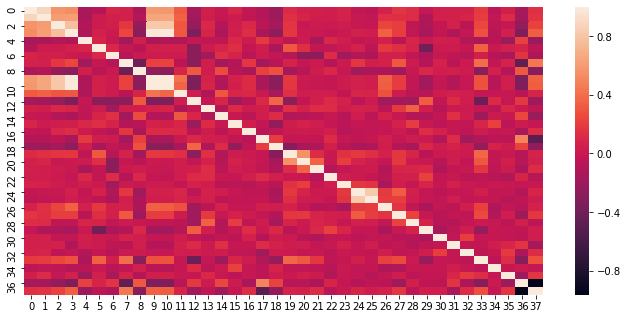

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
corr = df_filled.corr()
fig = plt.figure()
ax = fig.add_axes([0,0,1.5,1])
sns.heatmap(corr)

In [22]:
df_filled

,0,1,2,3,4,5,6,7,8,9,...,28,29,30,31,32,33,34,35,36,37
0,1138.40,1331.10,1280.7,11810.90,2.0,62.0,1.0,0.0,2.0,18240.0,...,1.60,41.0,7.79,1.92,1.24,1.06,74.00,1.0,2.0,0.0
1,1562.50,312.50,937.5,3750.00,2.0,81.0,1.0,0.0,2.0,10280.0,...,0.60,41.0,11.90,1.71,0.49,3.18,0.00,1.0,1.0,1.0
2,2717.00,1235.00,247.0,21736.00,2.0,50.0,1.0,0.0,2.0,32020.0,...,1.00,43.0,9.46,1.32,0.49,2.00,0.27,2.0,1.0,1.0
3,2091.00,605.50,2509.2,16309.80,1.0,74.0,2.0,3.0,2.0,25880.0,...,0.40,34.0,11.30,2.31,2.13,4.84,1.30,1.0,1.0,1.0
4,2175.60,777.00,932.4,27972.00,2.0,86.0,1.0,0.0,1.0,39120.0,...,0.40,42.8,7.00,0.65,0.20,5.36,1.20,2.0,2.0,0.0
5,2708.10,802.40,401.2,6920.70,2.0,72.0,2.0,0.0,2.0,13070.0,...,0.90,36.8,9.48,7.43,1.07,3.32,1.20,1.0,2.0,0.0
6,4516.20,1389.60,694.8,6369.00,2.0,42.0,1.0,3.0,1.0,16120.0,...,0.20,34.3,7.74,1.44,0.77,2.05,3.00,1.0,1.0,1.0
7,2070.00,987.00,1380.0,8050.00,1.0,67.0,1.0,0.0,2.0,15430.0,...,0.50,35.0,11.40,2.21,0.77,2.80,4.00,1.0,2.0,0.0
8,1464.00,854.00,488.0,22448.00,2.0,75.0,1.0,3.0,1.0,37070.0,...,0.60,36.8,5.62,0.99,0.77,2.86,0.51,1.0,1.0,1.0
9,2156.70,616.20,924.3,27729.00,2.0,67.0,1.0,3.0,2.0,44320.0,...,0.30,46.0,5.60,0.52,0.26,3.40,1.20,1.0,1.0,1.0


In [23]:
count_nan1 = len(df_filled) - df_filled.count()

In [24]:
count_nan1

0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    0
12    0
13    0
14    0
15    0
16    0
17    0
18    0
19    0
20    0
21    0
22    0
23    0
24    0
25    0
26    0
27    0
28    0
29    0
30    0
31    0
32    0
33    0
34    0
35    0
36    0
37    0
dtype: int64

In [25]:
column_s = df.columns
print(column_s)
df_filled.columns = column_s

Index(['TLC', 'T8C', 'NCC', ' MBC', 'CD38 ', 'AGE', 'SEX', 'NLymph ', 'SMG',
       'WBC', 'ALC', 'SNC', ' HGB ', 'MCV', 'PLT', 'RET', 'MOR', 'LD',
       'COOMBS', 'UR', 'CR', 'UA ', 'NA', 'K', 'GOT', 'GPT', 'ALP', 'LDH ',
       'BU', 'ALB', 'IgG', 'IgA', 'IgM', 'B2M', 'ZAP_70', 'MP', 'Ctx',
       'Ctx_tgt'],
      dtype='object')


In [26]:
column_s = df.columns
print(column_s)
df_filled.columns = column_s
cols = ['Ctx','AID']
#cols = [36,37]
X = df_filled[df_filled.columns.difference(cols)]
print(X.columns)
Y = df_filled['Ctx_tgt']#0/1 tgt variable
#print(Y)

Index(['TLC', 'T8C', 'NCC', ' MBC', 'CD38 ', 'AGE', 'SEX', 'NLymph ', 'SMG',
       'WBC', 'ALC', 'SNC', ' HGB ', 'MCV', 'PLT', 'RET', 'MOR', 'LD',
       'COOMBS', 'UR', 'CR', 'UA ', 'NA', 'K', 'GOT', 'GPT', 'ALP', 'LDH ',
       'BU', 'ALB', 'IgG', 'IgA', 'IgM', 'B2M', 'ZAP_70', 'MP', 'Ctx',
       'Ctx_tgt'],
      dtype='object')
Index([' HGB ', ' MBC', 'AGE', 'ALB', 'ALC', 'ALP', 'B2M', 'BU', 'CD38 ',
       'COOMBS', 'CR', 'Ctx_tgt', 'GOT', 'GPT', 'IgA', 'IgG', 'IgM', 'K', 'LD',
       'LDH ', 'MCV', 'MOR', 'MP', 'NA', 'NCC', 'NLymph ', 'PLT', 'RET', 'SEX',
       'SMG', 'SNC', 'T8C', 'TLC', 'UA ', 'UR', 'WBC', 'ZAP_70'],
      dtype='object')


In [27]:
#print(df_filled)
print(column_s)

Index(['TLC', 'T8C', 'NCC', ' MBC', 'CD38 ', 'AGE', 'SEX', 'NLymph ', 'SMG',
       'WBC', 'ALC', 'SNC', ' HGB ', 'MCV', 'PLT', 'RET', 'MOR', 'LD',
       'COOMBS', 'UR', 'CR', 'UA ', 'NA', 'K', 'GOT', 'GPT', 'ALP', 'LDH ',
       'BU', 'ALB', 'IgG', 'IgA', 'IgM', 'B2M', 'ZAP_70', 'MP', 'Ctx',
       'Ctx_tgt'],
      dtype='object')


# Split dataset into train and test data

In [28]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.20, random_state=112)

In [29]:
from sklearn.feature_selection import chi2

# Fisher Score for feature elimination

In [30]:
fisher_score = chi2(X_train, y_train)
fisher_score
#Two arrays are returned: F scores and P value. More the P value, more difference between the distributions.

(array([1.82330230e+00, 9.31002328e+05, 2.28350037e-01, 6.24127737e-02,
        9.81340696e+05, 4.09064922e+01, 9.16330775e+00, 5.54609685e-02,
        1.23865241e+00, 3.73318524e-01, 3.53069637e-03, 1.46000000e+02,
        2.94685352e+01, 2.35484403e+00, 6.42001086e+00, 9.12688770e+01,
        8.57179673e+01, 1.05744101e-03, 3.98922435e+00, 1.07134067e+02,
        3.75046111e-01, 5.42410405e-01, 4.78373802e-01, 4.94127980e-02,
        1.15190566e+04, 8.51550545e+01, 2.57693558e+05, 1.52069617e+04,
        6.16830176e-01, 1.22403135e+00, 4.11638993e+03, 8.20484696e+03,
        7.07364741e+03, 3.67618475e+00, 2.33960041e+00, 1.07754641e+06,
        3.56351158e+00]),
 array([1.76920697e-01, 0.00000000e+00, 6.32749959e-01, 8.02722309e-01,
        0.00000000e+00, 1.59689770e-10, 2.46915857e-03, 8.13819495e-01,
        2.65730926e-01, 5.41200922e-01, 9.52617852e-01, 1.29819858e-33,
        5.68319045e-08, 1.24894376e-01, 1.12841471e-02, 1.25417827e-21,
        2.07518766e-20, 9.74058708e-01

In [31]:
p_values = pd.Series(fisher_score[0])
print(min(p_values))
p_values.index = X_train.columns
p_values.sort_values(ascending=False)
#Smaller the p_value, more significant the feature is to predict the target value i

0.0010574410143974725


WBC        1.077546e+06
ALC        9.813407e+05
 MBC       9.310023e+05
PLT        2.576936e+05
RET        1.520696e+04
NCC        1.151906e+04
T8C        8.204847e+03
TLC        7.073647e+03
SNC        4.116390e+03
Ctx_tgt    1.460000e+02
LDH        1.071341e+02
IgG        9.126888e+01
IgM        8.571797e+01
NLymph     8.515505e+01
ALP        4.090649e+01
GOT        2.946854e+01
B2M        9.163308e+00
IgA        6.420011e+00
LD         3.989224e+00
UA         3.676185e+00
ZAP_70     3.563512e+00
GPT        2.354844e+00
UR         2.339600e+00
 HGB       1.823302e+00
CD38       1.238652e+00
SMG        1.224031e+00
SEX        6.168302e-01
MOR        5.424104e-01
MP         4.783738e-01
MCV        3.750461e-01
COOMBS     3.733185e-01
AGE        2.283500e-01
ALB        6.241277e-02
BU         5.546097e-02
NA         4.941280e-02
CR         3.530696e-03
K          1.057441e-03
dtype: float64

# Maximum Percentile

In [32]:
from sklearn.feature_selection import SelectPercentile, chi2
X_train.shape
X_new = SelectPercentile(chi2, percentile=50).fit_transform(X_train, y_train)
pd.DataFrame(data=X_new[1:,1:],columns=X_new[0,1:])

,7520.0,52.0,1.27,0.0,26.0,1.66,9.7,0.7100000000000001,299.0,376.0,0.0,212000.0,110000.0,4020.0,526.4,1729.6,12620.0
0,8810.0,48.0,1.21,0.0,17.0,1.60,7.44,0.47,256.0,528.6,2.0,214000.0,57500.0,3130.0,792.90,1497.7,12580.0
1,15290.0,72.0,2.10,0.0,21.0,0.76,517.00,0.30,300.0,764.5,0.0,154000.0,11020.0,6550.0,764.50,1223.2,22580.0
2,37560.0,68.0,7.12,0.0,11.0,0.39,6.42,0.19,308.0,751.2,0.0,147000.0,46700.0,5860.0,2253.60,2629.2,47280.0
3,7060.0,48.0,3.20,1.0,23.0,2.84,12.80,0.79,471.0,917.8,3.0,136000.0,47400.0,4820.0,564.80,1765.0,13500.0
4,6460.0,35.0,6.00,0.0,19.0,3.48,12.80,0.88,450.0,532.0,0.0,165000.0,88800.0,3670.0,1098.20,1615.0,11200.0
5,15920.0,100.0,3.65,1.0,48.0,0.64,6.78,0.78,308.0,318.4,0.0,284000.0,91800.0,7030.0,477.60,1910.4,25930.0
6,12600.0,63.0,1.89,0.0,24.0,2.70,8.31,0.20,287.0,882.0,0.0,140000.0,64000.0,2760.0,378.00,1512.0,16750.0
7,12310.0,60.0,4.24,0.0,24.0,0.98,9.51,0.88,385.0,615.5,1.0,137000.0,37200.0,2630.0,984.80,3077.5,16780.0
8,22690.0,83.0,2.77,0.0,22.0,4.46,12.00,0.41,299.0,453.8,2.0,275000.0,45400.0,4670.0,1361.40,2949.7,30170.0
9,12850.0,63.0,3.18,0.0,24.0,3.33,9.62,0.62,382.0,1670.5,1.0,340000.0,51600.0,4350.0,257.00,899.5,18650.0


In [33]:
#cols = ['GPT','IgA','B2M','GOT','IgM','NLymph ','IgG','LDH ','RET','SNC','T8C','TLC','ALC','PLT','WBC',' MBC','NCC']

cols = ['WBC','ALC',' MBC','PLT']
#cols = [' MBC', 'ALC', 'BU', 'CR', 'PLT', 'RET', 'T8C', 'WB C']
#cols = [' HGB ', ' MBC', 'AGE', 'ALC', 'BU', 'CD38 ', 'COOMBS', 'CR', 'GOT', 'IgA', 'LDH ', 'NCC', 'PLT', 'RET', 'SNC', 'T8C', 'WBC']
X_c=X_train[cols]
X_t= X_test[cols]

# Support Vector Machine

In [34]:
from sklearn import svm
clf = svm.SVC(probability=True)
clf.fit(X_c, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=True, random_state=None, shrinking=True, tol=0.001,
    verbose=False)

In [35]:
y_pre = clf.predict_proba(X_t)
y_pre = y_pre[:, 1]
print(y_pre)

[0.26821206 0.23910532 0.39602952 0.25418996 0.23928953 0.24876931
 0.39794083 0.25289928 0.23691767 0.24631492 0.25833738 0.2828878
 0.27505379 0.31393428 0.24389977 0.25043431 0.25388555 0.25564471
 0.29054302 0.39240583 0.25795514 0.28924446 0.28706504 0.25396791
 0.27626299 0.2385123  0.26554821 0.24434623 0.25515454 0.25636126
 0.24395824 0.24226025 0.24680576 0.25045176 0.27655889 0.25426469
 0.25309479 0.25682946 0.26166749 0.28837089 0.23784164 0.26442007
 0.23886783 0.91633097 0.33601842 0.24645703 0.2586199  0.24733417
 0.24110227 0.88512962 0.25073352 0.28090986 0.27155112]


In [36]:
print('Accuracy of classification with SVM',clf.score(X_t, y_test))

Accuracy of classification with SVM 0.8301886792452831


# ROC-AUC curve for SVM

In [37]:
def ROC():
        import matplotlib.pyplot as plt
 
        %matplotlib inline
        plt.rcParams['figure.figsize'] = (8, 6)
        plt.rcParams['font.size'] = 14
        
        # plot ROC curve
 
        fpr, tpr, thresholds = roc_curve(y_test, y_pre)
        
        roc_auc = auc(fpr, tpr)
        lr_precision, lr_recall, _ = precision_recall_curve(y_test, y_pre)
        
        # method I: plt

        plt.title('Decision Variables ROC')
        plt.plot(fpr, tpr, 'b', label='AUC = %0.2f' % roc_auc)
        plt.legend(loc='lower right')
        plt.plot([0, 1], [0, 1], 'r--')
        plt.xlim([0, 1])
        plt.ylim([0, 1])
        plt.ylabel('True Positive Rate')
        plt.xlabel('False Positive Rate')
        plt.legend()
        # show the plot
        plt.show()
        
        no_skill = len(y_test[y_test==1]) / len(y_test)
        plt.plot([0, 1], [no_skill, no_skill], linestyle='--', label='No Skill')
        plt.plot(lr_recall, lr_precision, marker='.', label='SVM')
        # axis labels
        plt.xlabel('Recall')
        plt.ylabel('Precision')
        # show the legend
        plt.legend()
        # show the plot
        plt.show()

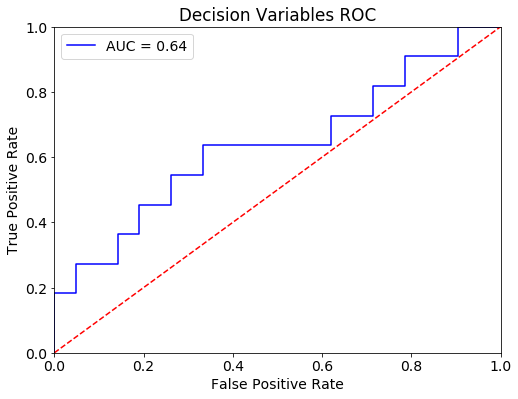

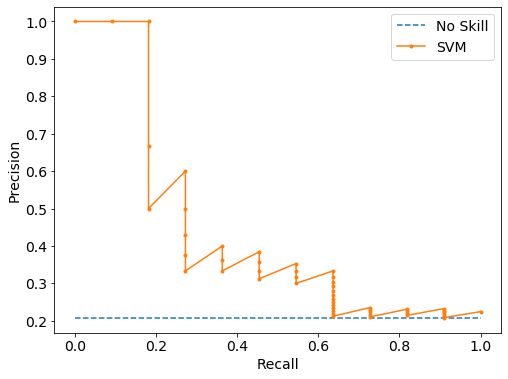

In [38]:
ROC() #first call for SVM 

# Random Forest

In [39]:
from sklearn.ensemble import RandomForestClassifier

cols = [' HGB ', ' MBC', 'AGE', 'ALC', 'BU', 'CD38 ', 'COOMBS', 'CR', 'GOT', 'IgA', 'LDH ', 'NCC', 'PLT', 'RET', 'SNC', 'T8C', 'WBC']
#cols = [' HGB ', ' MBC', 'AGE', 'ALC', 'BU', 'CD38 ', 'COOMBS', 'CR', 'GOT', 'IgA', 'LDH ', 'NCC', 'PLT', 'RET', 'SNC', 'T8C', 'WBC']
X_c_f=X_train[cols]
X_t= X_test[cols]
clf=RandomForestClassifier(n_estimators=100,min_samples_split = 72,
                                n_jobs = -1, verbose = 1)

#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(X_c_f,y_train)

y_predt=clf.predict(X_t)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.0s finished


In [40]:
from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_predt))

Accuracy: 0.7924528301886793


In [41]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_predt))

              precision    recall  f1-score   support

         0.0       0.84      0.90      0.87        42
         1.0       0.50      0.36      0.42        11

    accuracy                           0.79        53
   macro avg       0.67      0.63      0.65        53
weighted avg       0.77      0.79      0.78        53



In [42]:
from sklearn.metrics import confusion_matrix
matrix = confusion_matrix(y_test, y_predt)

print(matrix.diagonal()/matrix.sum(axis=1))

[0.9047619  0.36363636]


In [43]:
matrix

array([[38,  4],
       [ 7,  4]], dtype=int64)

[[38  4]
 [ 7  4]]


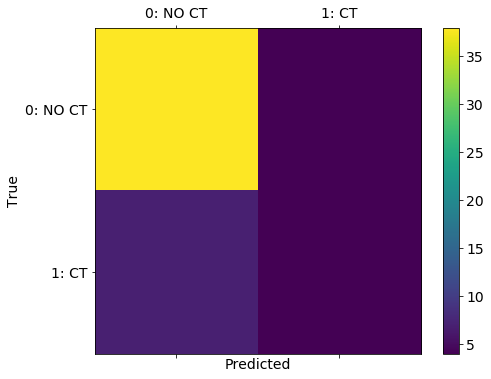

In [44]:
labels = ['0: NO CT', '1: CT']
matrix = confusion_matrix(y_test, y_predt)

fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(matrix)
print(matrix)
fig.colorbar(cax)
ax.set_xticklabels([''] + labels)
ax.set_yticklabels([''] + labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# ROC-AUC Curve for RandomForest

In [45]:
def ROC():
        import matplotlib.pyplot as plt
 
        %matplotlib inline
        plt.rcParams['figure.figsize'] = (8, 6)
        plt.rcParams['font.size'] = 14
        
        # plot ROC curve
 
        fpr, tpr, thresholds = roc_curve(y_test, y_pre)
        
        roc_auc = auc(fpr, tpr)
        lr_precision, lr_recall, _ = precision_recall_curve(y_test, y_pre)
        
        # method I: plt

        plt.title('Decision Variables ROC')
        plt.plot(fpr, tpr, 'b', label='AUC = %0.2f' % roc_auc)
        plt.legend(loc='lower right')
        plt.plot([0, 1], [0, 1], 'r--')
        plt.xlim([0, 1])
        plt.ylim([0, 1])
        plt.ylabel('True Positive Rate')
        plt.xlabel('False Positive Rate')
        plt.legend()
        # show the plot
        plt.show()
        
        no_skill = len(y_test[y_test==1]) / len(y_test)
        plt.plot([0, 1], [no_skill, no_skill], linestyle='--', label='No Skill')
        plt.plot(lr_recall, lr_precision, marker='.', label='SVM')
        # axis labels
        plt.xlabel('Recall')
        plt.ylabel('Precision')
        # show the legend
        plt.legend()
        # show the plot
        plt.show()

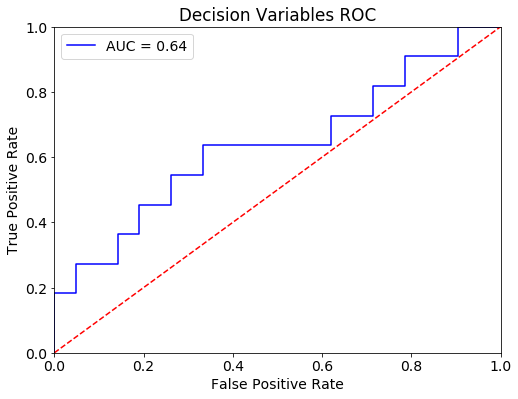

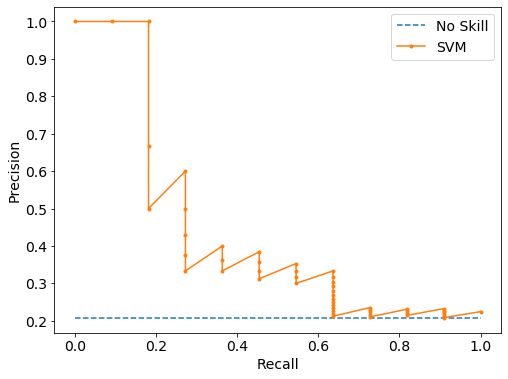

In [46]:
ROC()

In [47]:
import statsmodels.api as sm

X_1 = sm.add_constant(X)
#Fitting sm.OLS model
model = sm.OLS(Y,X_1).fit()
model.pvalues


C:\Users\pratik\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


const      9.044339e-03
 HGB       3.556652e-13
 MBC       4.864886e-01
AGE        3.668172e-01
ALB        6.282826e-02
ALC        9.075337e-01
ALP        3.759385e-01
B2M        2.475662e-02
BU         1.003126e-02
CD38       3.771883e-03
COOMBS     6.144923e-04
CR         6.057688e-01
Ctx_tgt    0.000000e+00
GOT        1.934790e-05
GPT        9.826401e-06
IgA        8.056637e-04
IgG        3.797261e-01
IgM        5.970058e-01
K          1.840240e-01
LD         4.847536e-01
LDH        9.067722e-01
MCV        1.410043e-08
MOR        6.868440e-01
MP         9.617863e-01
NA         1.034026e-01
NCC        2.084436e-01
NLymph     1.076779e-02
PLT        2.217735e-01
RET        7.320175e-01
SEX        8.959901e-01
SMG        9.620645e-01
SNC        1.449015e-01
T8C        1.676918e-01
TLC        1.974577e-01
UA         9.242126e-01
UR         4.843216e-01
WBC        5.293022e-01
ZAP_70     2.044667e-01
dtype: float64

In [48]:
cols = list(X.columns)
pmax = 1
while (len(cols)>0):
    p= []
    X_1 = X[cols]
    X_1 = sm.add_constant(X_1)
    model = sm.OLS(Y,X_1).fit()
    p = pd.Series(model.pvalues.values[1:],index = cols)      
    pmax = max(p)
    feature_with_p_max = p.idxmax()
    if(pmax>0.9):
        cols.remove(feature_with_p_max)
    else:
        break
selected_features_BE = cols
print(selected_features_BE)

[' MBC', 'AGE', 'ALC', 'B2M', 'COOMBS', 'CR', 'Ctx_tgt', 'GOT', 'GPT', 'IgG', 'LDH ', 'MOR', 'NA', 'NCC', 'NLymph ', 'PLT', 'RET', 'SNC', 'T8C', 'TLC', 'WBC']


In [49]:
from sklearn.tree import DecisionTreeClassifier 
clf = DecisionTreeClassifier(criterion="entropy")
clf = clf.fit(X_c_f,y_train)

In [50]:
y_pred=clf.predict(X_t)

In [51]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)
# # Model Accuracy, how often is the classifier correct?
# print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

0.6415094339622641

In [52]:
matrix = confusion_matrix(y_test, y_pred)

[[30 12]
 [ 7  4]]


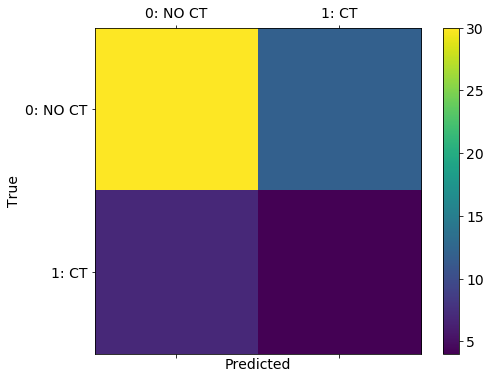

In [53]:
labels = ['0: NO CT', '1: CT']
print(matrix)
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(matrix)
fig.colorbar(cax)
ax.set_xticklabels([''] + labels)
ax.set_yticklabels([''] + labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [54]:
def ROC():
        import matplotlib.pyplot as plt
 
        %matplotlib inline
        plt.rcParams['figure.figsize'] = (8, 6)
        plt.rcParams['font.size'] = 14
        
        # plot ROC curve
 
        fpr, tpr, thresholds = roc_curve(y_test, y_pre)
        
        roc_auc = auc(fpr, tpr)
        lr_precision, lr_recall, _ = precision_recall_curve(y_test, y_pre)
        
        # method I: plt

        plt.title('Decision Variables ROC')
        plt.plot(fpr, tpr, 'b', label='AUC = %0.2f' % roc_auc)
        plt.legend(loc='lower right')
        plt.plot([0, 1], [0, 1], 'r--')
        plt.xlim([0, 1])
        plt.ylim([0, 1])
        plt.ylabel('True Positive Rate')
        plt.xlabel('False Positive Rate')
        plt.legend()
        # show the plot
        plt.show()
        
        no_skill = len(y_test[y_test==1]) / len(y_test)
        plt.plot([0, 1], [no_skill, no_skill], linestyle='--', label='No Skill')
        plt.plot(lr_recall, lr_precision, marker='.', label='Decision Tree')
        # axis labels
        plt.xlabel('Recall')
        plt.ylabel('Precision')
        # show the legend
        plt.legend()
        # show the plot
        plt.show()

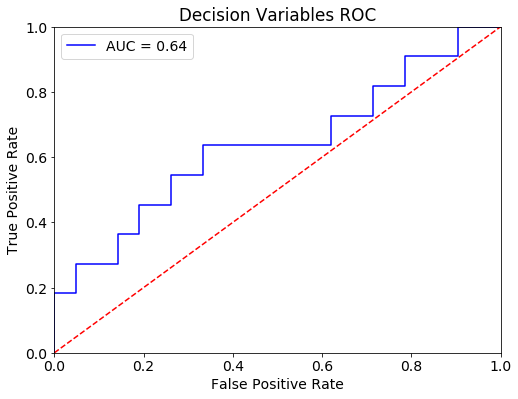

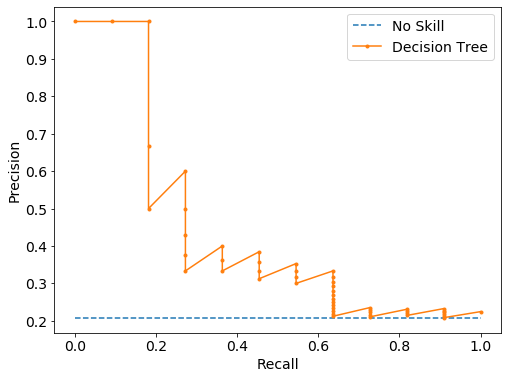

In [55]:
ROC()

# Naive Bayes

In [56]:
from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB()

gnb.fit(X_c_f, y_train)

y_pred = gnb.predict(X_t)

print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.7547169811320755


In [57]:
y_pred

array([0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
       0., 0., 0., 0., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 1., 0., 0., 0., 1., 1., 0., 0., 0., 0., 1., 0.,
       0., 0.])

[[37  5]
 [ 8  3]]


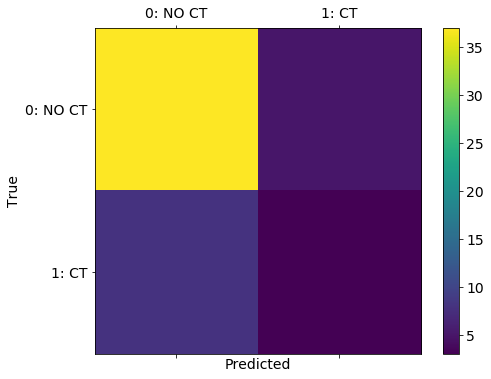

In [58]:
labels = ['0: NO CT', '1: CT']
matrix = confusion_matrix(y_test, y_pred)

fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(matrix)
print(matrix)
fig.colorbar(cax)
ax.set_xticklabels([''] + labels)
ax.set_yticklabels([''] + labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [59]:
def ROC():
        import matplotlib.pyplot as plt
        from sklearn.metrics import roc_curve
        from sklearn.metrics import auc
        %matplotlib inline
        plt.rcParams['figure.figsize'] = (8, 6)
        plt.rcParams['font.size'] = 14
        
        # plot ROC curve
 
        fpr, tpr, thresholds = roc_curve(y_test, y_predt)
        roc_auc = auc(fpr, tpr)
        lr_precision, lr_recall, _ = precision_recall_curve(y_test, y_predt)
    
        # method I: plt

        plt.title('Decision Variables ROC')
        plt.plot(fpr, tpr, 'b', label='AUC = %0.2f' % roc_auc)
        plt.legend(loc='lower right')
        plt.plot([0, 1], [0, 1], 'r--')
        plt.xlim([0, 1])
        plt.ylim([0, 1])
        plt.ylabel('True Positive Rate')
        plt.xlabel('False Positive Rate')
        plt.legend()
        # show the plot
        plt.show()
        
        no_skill = len(y_test[y_test==1]) / len(y_test)
        plt.plot([0, 1], [no_skill, no_skill], linestyle='--', label='No Skill')
        plt.plot(lr_recall, lr_precision, marker='.', label='Naive Bayes')
        # axis labels
        plt.xlabel('Recall')
        plt.ylabel('Precision')
        # show the legend
        plt.legend()
        # show the plot
        plt.show()

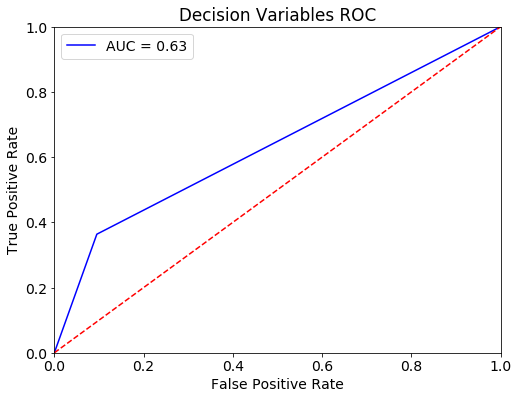

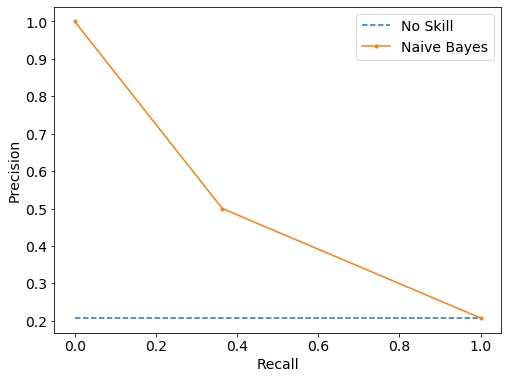

In [60]:
ROC()

In [61]:
import xgboost as xgb
D_train = xgb.DMatrix(X_c_f, label = y_train)
D_test = xgb.DMatrix(X_t, label = y_test)

In [62]:
param = {
    'eta': 0.3, 
    'max_depth': 3,  
    'objective': 'multi:softprob',  
    'num_class': 3} 
steps = 100

In [63]:
model = xgb.train(param, D_train,steps)

In [64]:
from sklearn.metrics import precision_score, recall_score, accuracy_score

preds = model.predict(D_test)
best_preds = np.asarray([np.argmax(line) for line in preds])

print("Precision = {}".format(precision_score(y_test, best_preds, average='macro')))
print("Recall = {}".format(recall_score(y_test, best_preds, average='macro')))
print("Accuracy = {}".format(accuracy_score(y_test, best_preds)))

Precision = 0.7166666666666667
Recall = 0.6125541125541125
Accuracy = 0.8113207547169812


[[40  2]
 [ 8  3]]


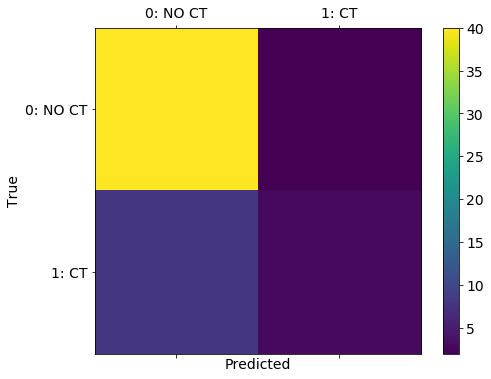

In [65]:
#print confusion matrix

labels = ['0: NO CT', '1: CT']
matrix = confusion_matrix(y_test, best_preds)

fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(matrix)
print(matrix)
fig.colorbar(cax)
ax.set_xticklabels([''] + labels)
ax.set_yticklabels([''] + labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [66]:
def ROC():
        import matplotlib.pyplot as plt
        from sklearn.metrics import roc_curve
        from sklearn.metrics import auc
        %matplotlib inline
        plt.rcParams['figure.figsize'] = (8, 6)
        plt.rcParams['font.size'] = 14
        
        # plot ROC curve
        fpr, tpr, thresholds = roc_curve(y_test, y_predt)
        roc_auc = auc(fpr, tpr)
        lr_precision, lr_recall, _ = precision_recall_curve(y_test, y_predt)
    
        # method I: plt

        plt.title('Decision Variables ROC')
        plt.plot(fpr, tpr, 'b', label='AUC = %0.2f' % roc_auc)
        plt.legend(loc='lower right')
        plt.plot([0, 1], [0, 1], 'r--')
        plt.xlim([0, 1])
        plt.ylim([0, 1])
        plt.ylabel('True Positive Rate')
        plt.xlabel('False Positive Rate')
        plt.legend()
        # show the plot
        plt.show()
        
        no_skill = len(y_test[y_test==1]) / len(y_test)
        plt.plot([0, 1], [no_skill, no_skill], linestyle='--', label='No Skill')
        plt.plot(lr_recall, lr_precision, marker='.', label='XGBoost')
        # axis labels
        plt.xlabel('Recall')
        plt.ylabel('Precision')
        # show the legend
        plt.legend()
        # show the plot
        plt.show()

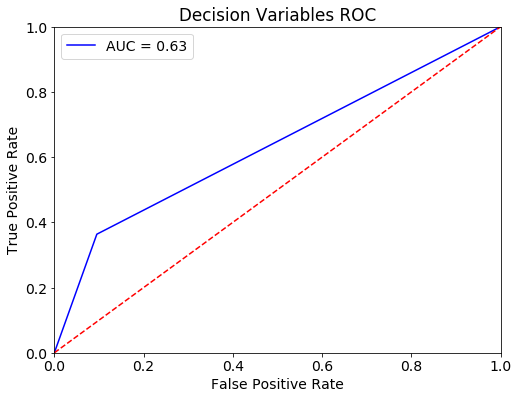

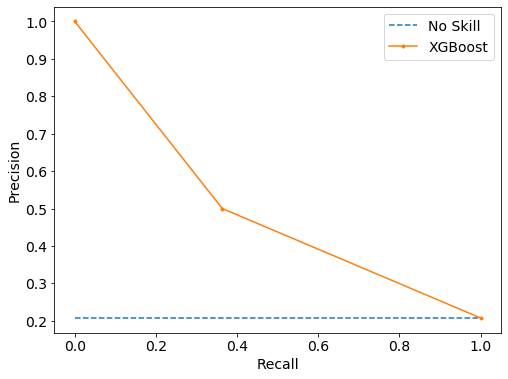

In [67]:
ROC()

# Autoimmune Disease Prediction (AID)

In [68]:
all_data

,Diagnosis date,Record date,Exitus date,TLC,T8C,NCC,MBC,CD38,AGE,SEX,...,ALB,IgG,IgA,IgM,B2M,ZAP_70,MP,Ctx,AID,Exitus
ID,,,,,,,,,,,,,,,,,,,,,
1,2003-05-04,2008-08-01,NaT,1138.40,NaN,1280.7,11810.90,2.0,62,1,...,41.0,7.79,1.92,1.24,1.06,NaN,1.0,2.0,2.0,NaN
2,2002-11-02,2009-04-20,NaT,1562.50,312.50,937.5,3750.00,2.0,81,1,...,41.0,11.90,1.71,0.49,3.18,NaN,1.0,1.0,2.0,NaN
3,1997-02-24,2009-07-21,NaT,2717.00,1235.00,247.0,21736.00,2.0,50,1,...,43.0,9.46,1.32,0.49,2.00,0.27,2.0,1.0,2.0,NaN
4,2004-03-02,2009-05-05,NaT,2091.00,NaN,2509.2,16309.80,NaN,74,2,...,34.0,11.30,2.31,2.13,4.84,NaN,1.0,1.0,2.0,NaN
5,2006-12-04,2009-04-02,NaT,2175.60,777.00,932.4,27972.00,2.0,86,1,...,42.8,7.00,0.65,0.20,5.36,1.20,2.0,2.0,2.0,NaN
6,1996-02-07,2009-06-09,NaT,2708.10,802.40,401.2,6920.70,2.0,72,2,...,36.8,9.48,7.43,1.07,3.32,1.20,1.0,2.0,2.0,NaN
7,2005-04-01,2009-06-09,NaT,4516.20,1389.60,694.8,6369.00,2.0,42,1,...,34.3,7.74,1.44,0.77,2.05,3.00,1.0,1.0,2.0,NaN
8,1999-06-19,2009-05-07,NaT,2070.00,NaN,1380.0,8050.00,NaN,67,1,...,35.0,11.40,2.21,0.77,2.80,NaN,1.0,2.0,2.0,NaN
9,2007-04-13,2009-04-18,NaT,1464.00,854.00,488.0,22448.00,2.0,75,1,...,36.8,5.62,0.99,0.77,2.86,0.51,1.0,1.0,2.0,NaN


In [69]:
df_a = all_data.drop(columns=['Diagnosis date', 'Record date','Exitus date','Exitus','Ctx'])
print(df_a)

         TLC      T8C     NCC        MBC  CD38   AGE  SEX  NLymph   SMG  \
ID                                                                        
1    1138.40      NaN  1280.7   11810.90    2.0   62    1      0.0  2.0   
2    1562.50   312.50   937.5    3750.00    2.0   81    1      0.0  2.0   
3    2717.00  1235.00   247.0   21736.00    2.0   50    1      0.0  2.0   
4    2091.00      NaN  2509.2   16309.80    NaN   74    2      3.0  2.0   
5    2175.60   777.00   932.4   27972.00    2.0   86    1      0.0  1.0   
6    2708.10   802.40   401.2    6920.70    2.0   72    2      0.0  2.0   
7    4516.20  1389.60   694.8    6369.00    2.0   42    1      3.0  1.0   
8    2070.00      NaN  1380.0    8050.00    NaN   67    1      0.0  2.0   
9    1464.00   854.00   488.0   22448.00    2.0   75    1      3.0  1.0   
10   2156.70   616.20   924.3   27729.00    NaN   67    1      3.0  2.0   
11   5097.00  1699.00  6796.0  158007.00    1.0   47    2      0.0  1.0   
12   3884.40  2241.00   2

In [70]:
df_a['AID_tgt'] = [0.0 if x == 2.0 else 1.0 for x in df_a['AID']] 
print(df_a)
print(len(df_a[df_a.AID_tgt == 1.0]))

         TLC      T8C     NCC        MBC  CD38   AGE  SEX  NLymph   SMG  \
ID                                                                        
1    1138.40      NaN  1280.7   11810.90    2.0   62    1      0.0  2.0   
2    1562.50   312.50   937.5    3750.00    2.0   81    1      0.0  2.0   
3    2717.00  1235.00   247.0   21736.00    2.0   50    1      0.0  2.0   
4    2091.00      NaN  2509.2   16309.80    NaN   74    2      3.0  2.0   
5    2175.60   777.00   932.4   27972.00    2.0   86    1      0.0  1.0   
6    2708.10   802.40   401.2    6920.70    2.0   72    2      0.0  2.0   
7    4516.20  1389.60   694.8    6369.00    2.0   42    1      3.0  1.0   
8    2070.00      NaN  1380.0    8050.00    NaN   67    1      0.0  2.0   
9    1464.00   854.00   488.0   22448.00    2.0   75    1      3.0  1.0   
10   2156.70   616.20   924.3   27729.00    NaN   67    1      3.0  2.0   
11   5097.00  1699.00  6796.0  158007.00    1.0   47    2      0.0  1.0   
12   3884.40  2241.00   2

In [71]:
count_nan = len(df_a) - df_a.count()

In [72]:
count_nan.tolist()

[9,
 36,
 24,
 24,
 118,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 65,
 4,
 26,
 15,
 2,
 1,
 7,
 25,
 24,
 5,
 2,
 12,
 8,
 10,
 4,
 9,
 9,
 9,
 17,
 207,
 3,
 2,
 0]

In [73]:
store=[]
sample_freq=[]
for i in range(len(count_nan)):
    store.append(len(df_a)-count_nan[i])

print(store)
# count_nan
sample_freq = []
for k in store:
    k = k/len(df_a) * 100
    sample_freq.append(k)

[256, 229, 241, 241, 147, 265, 265, 264, 264, 265, 265, 265, 265, 265, 265, 200, 261, 239, 250, 263, 264, 258, 240, 241, 260, 263, 253, 257, 255, 261, 256, 256, 256, 248, 58, 262, 263, 265]


In [74]:
print(len(sample_freq))

38


In [75]:
sample_freq = list(filter(lambda x: x > [50], sample_freq))#after filtering less than 50% score

In [76]:
print(sample_freq)

[96.60377358490567, 86.41509433962264, 90.9433962264151, 90.9433962264151, 55.471698113207545, 100.0, 100.0, 99.62264150943396, 99.62264150943396, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 75.47169811320755, 98.49056603773585, 90.18867924528303, 94.33962264150944, 99.24528301886792, 99.62264150943396, 97.35849056603773, 90.56603773584906, 90.9433962264151, 98.11320754716981, 99.24528301886792, 95.47169811320755, 96.98113207547169, 96.22641509433963, 98.49056603773585, 96.60377358490567, 96.60377358490567, 96.60377358490567, 93.58490566037736, 98.86792452830188, 99.24528301886792, 100.0]


In [77]:
column_s = df.columns
print(column_s)
df_filled.columns = column_s

Index(['TLC', 'T8C', 'NCC', ' MBC', 'CD38 ', 'AGE', 'SEX', 'NLymph ', 'SMG',
       'WBC', 'ALC', 'SNC', ' HGB ', 'MCV', 'PLT', 'RET', 'MOR', 'LD',
       'COOMBS', 'UR', 'CR', 'UA ', 'NA', 'K', 'GOT', 'GPT', 'ALP', 'LDH ',
       'BU', 'ALB', 'IgG', 'IgA', 'IgM', 'B2M', 'ZAP_70', 'MP', 'Ctx',
       'Ctx_tgt'],
      dtype='object')


In [78]:
data = {'Variables': ['TLC','T8C','NCC',' MBC','CD38 ','AGE','SEX','NLymph','SMG','WBC','ALC',
 'SNC',' HGB ','MCV','PLT','RET','MOR','LD','COOMBS','UR','CR','UA ','NA',
 'K','GOT','GPT','ALP','LDH ','BU','ALB','IgG','IgA','IgM','B2M',
 'MP','AID_tgt'],'Sample_freq':[96.60377358490567, 86.41509433962264, 90.9433962264151, 90.9433962264151, 100.0, 100.0, 99.62264150943396, 99.62264150943396, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 75.47169811320755, 98.49056603773585, 90.18867924528303, 94.33962264150944, 99.24528301886792, 99.62264150943396, 97.35849056603773, 90.56603773584906, 90.9433962264151, 98.11320754716981, 99.24528301886792, 95.47169811320755, 96.98113207547169, 96.22641509433963, 98.49056603773585, 96.60377358490567, 96.60377358490567, 96.60377358490567, 93.58490566037736, 98.86792452830188, 99.24528301886792, 100.0]} 

df_with_sfreq = pd.DataFrame(data,columns = ['Variables', 'Sample_freq'])
print(df_with_sfreq)

   Variables  Sample_freq
0        TLC    96.603774
1        T8C    86.415094
2        NCC    90.943396
3        MBC    90.943396
4      CD38    100.000000
5        AGE   100.000000
6        SEX    99.622642
7     NLymph    99.622642
8        SMG   100.000000
9        WBC   100.000000
10       ALC   100.000000
11       SNC   100.000000
12      HGB    100.000000
13       MCV   100.000000
14       PLT    75.471698
15       RET    98.490566
16       MOR    90.188679
17        LD    94.339623
18    COOMBS    99.245283
19        UR    99.622642
20        CR    97.358491
21       UA     90.566038
22        NA    90.943396
23         K    98.113208
24       GOT    99.245283
25       GPT    95.471698
26       ALP    96.981132
27      LDH     96.226415
28        BU    98.490566
29       ALB    96.603774
30       IgG    96.603774
31       IgA    96.603774
32       IgM    93.584906
33       B2M    98.867925
34        MP    99.245283
35   AID_tgt   100.000000


In [79]:
from sklearn.impute import KNNImputer
# from sklearn.preprocessing.Imputer import KNNImputer
imputer = KNNImputer(n_neighbors=1)

df_filled1 = pd.DataFrame(imputer.fit_transform(df_a))

In [80]:
print(df_filled1)

          0        1       2          3    4     5    6    7    8         9   \
0    1138.40  1331.10  1280.7   11810.90  2.0  62.0  1.0  0.0  2.0   18240.0   
1    1562.50   312.50   937.5    3750.00  2.0  81.0  1.0  0.0  2.0   10280.0   
2    2717.00  1235.00   247.0   21736.00  2.0  50.0  1.0  0.0  2.0   32020.0   
3    2091.00   605.50  2509.2   16309.80  1.0  74.0  2.0  3.0  2.0   25880.0   
4    2175.60   777.00   932.4   27972.00  2.0  86.0  1.0  0.0  1.0   39120.0   
5    2708.10   802.40   401.2    6920.70  2.0  72.0  2.0  0.0  2.0   13070.0   
6    4516.20  1389.60   694.8    6369.00  2.0  42.0  1.0  3.0  1.0   16120.0   
7    2070.00   987.00  1380.0    8050.00  1.0  67.0  1.0  0.0  2.0   15430.0   
8    1464.00   854.00   488.0   22448.00  2.0  75.0  1.0  3.0  1.0   37070.0   
9    2156.70   616.20   924.3   27729.00  2.0  67.0  1.0  3.0  2.0   44320.0   
10   5097.00  1699.00  6796.0  158007.00  1.0  47.0  2.0  0.0  1.0  230890.0   
11   3884.40  2241.00   298.8    3286.80

# Heatmap for AID prediction

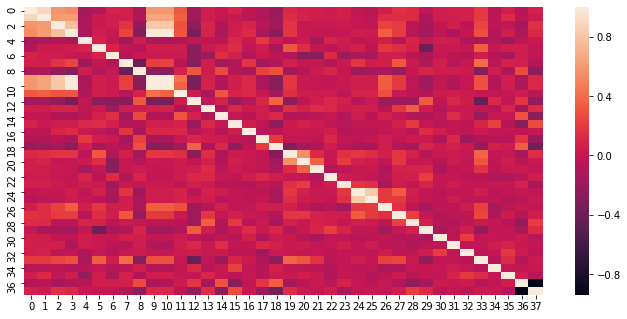

In [81]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
corr = df_filled1.corr()
fig = plt.figure()
ax = fig.add_axes([0,0,1.5,1])
sns.heatmap(corr)

In [82]:
count_nan1 = len(df_filled1) - df_filled1.count()

In [83]:
count_nan1

0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    0
12    0
13    0
14    0
15    0
16    0
17    0
18    0
19    0
20    0
21    0
22    0
23    0
24    0
25    0
26    0
27    0
28    0
29    0
30    0
31    0
32    0
33    0
34    0
35    0
36    0
37    0
dtype: int64

In [84]:
column_s = df_a.columns
print(column_s)
df_filled1.columns = column_s

Index(['TLC', 'T8C', 'NCC', ' MBC', 'CD38 ', 'AGE', 'SEX', 'NLymph ', 'SMG',
       'WBC', 'ALC', 'SNC', ' HGB ', 'MCV', 'PLT', 'RET', 'MOR', 'LD',
       'COOMBS', 'UR', 'CR', 'UA ', 'NA', 'K', 'GOT', 'GPT', 'ALP', 'LDH ',
       'BU', 'ALB', 'IgG', 'IgA', 'IgM', 'B2M', 'ZAP_70', 'MP', 'AID',
       'AID_tgt'],
      dtype='object')


In [85]:
cols = ['AID_tgt']
#cols = [36,37]
print(df_filled1.columns)
X = df_filled1[df_filled1.columns.difference(cols)]
print(X.columns)
Y = df_filled1['AID_tgt']#0/1 tgt variable
print(Y)

Index(['TLC', 'T8C', 'NCC', ' MBC', 'CD38 ', 'AGE', 'SEX', 'NLymph ', 'SMG',
       'WBC', 'ALC', 'SNC', ' HGB ', 'MCV', 'PLT', 'RET', 'MOR', 'LD',
       'COOMBS', 'UR', 'CR', 'UA ', 'NA', 'K', 'GOT', 'GPT', 'ALP', 'LDH ',
       'BU', 'ALB', 'IgG', 'IgA', 'IgM', 'B2M', 'ZAP_70', 'MP', 'AID',
       'AID_tgt'],
      dtype='object')
Index([' HGB ', ' MBC', 'AGE', 'AID', 'ALB', 'ALC', 'ALP', 'B2M', 'BU',
       'CD38 ', 'COOMBS', 'CR', 'GOT', 'GPT', 'IgA', 'IgG', 'IgM', 'K', 'LD',
       'LDH ', 'MCV', 'MOR', 'MP', 'NA', 'NCC', 'NLymph ', 'PLT', 'RET', 'SEX',
       'SMG', 'SNC', 'T8C', 'TLC', 'UA ', 'UR', 'WBC', 'ZAP_70'],
      dtype='object')
0      0.0
1      0.0
2      0.0
3      0.0
4      0.0
5      0.0
6      0.0
7      0.0
8      0.0
9      0.0
10     1.0
11     0.0
12     0.0
13     0.0
14     0.0
15     0.0
16     1.0
17     0.0
18     0.0
19     0.0
20     0.0
21     0.0
22     0.0
23     0.0
24     0.0
25     1.0
26     0.0
27     0.0
28     0.0
29     0.0
      ... 
235  

# Split dataset into 80% train and 20% test data

In [86]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.20, random_state=112)
print(X_train.columns)

Index([' HGB ', ' MBC', 'AGE', 'AID', 'ALB', 'ALC', 'ALP', 'B2M', 'BU',
       'CD38 ', 'COOMBS', 'CR', 'GOT', 'GPT', 'IgA', 'IgG', 'IgM', 'K', 'LD',
       'LDH ', 'MCV', 'MOR', 'MP', 'NA', 'NCC', 'NLymph ', 'PLT', 'RET', 'SEX',
       'SMG', 'SNC', 'T8C', 'TLC', 'UA ', 'UR', 'WBC', 'ZAP_70'],
      dtype='object')


In [87]:
from sklearn.feature_selection import chi2

# Fisher Score for feature elimination

In [88]:
fisher_score = chi2(X_train, y_train)
fisher_score

(array([4.62921355e-01, 8.30435144e+02, 2.64790479e-01, 4.94313454e+00,
        2.19310686e+00, 2.76229628e+03, 8.66446919e-01, 4.12335185e-05,
        3.81724606e-01, 7.54420448e-02, 5.98902326e-01, 4.90134646e-03,
        2.08955001e-03, 3.51746853e-01, 3.14786172e-01, 4.10986560e+01,
        6.16579819e+00, 3.01371157e-01, 8.47019417e-01, 1.21339998e+01,
        1.82868434e-02, 1.53920154e-03, 5.63369319e-02, 2.83670406e-02,
        8.29044989e+01, 5.28324599e+00, 3.80049108e+05, 1.57546635e+05,
        5.45245001e-02, 9.16283659e-01, 9.92613521e+02, 2.48778395e+03,
        2.43114263e+03, 9.50300368e-01, 4.48565745e+00, 2.54549652e+03,
        2.39818309e+00]),
 array([4.96261829e-001, 1.30336356e-182, 6.06847968e-001, 2.61944918e-002,
        1.38629439e-001, 0.00000000e+000, 3.51940833e-001, 9.94876553e-001,
        5.36681699e-001, 7.83571969e-001, 4.38997145e-001, 9.44186005e-001,
        9.63540121e-001, 5.53125941e-001, 5.74757942e-001, 1.44735831e-010,
        1.30243592e-00

In [89]:
p_values = pd.Series(fisher_score[0])
print(min(p_values))
p_values.index = X_train.columns
p_values.sort_values(ascending=False)

4.1233518489248805e-05


PLT        380049.107678
RET        157546.635024
ALC          2762.296279
WBC          2545.496523
T8C          2487.783948
TLC          2431.142628
SNC           992.613521
 MBC          830.435144
NCC            82.904499
IgG            41.098656
LDH            12.134000
IgM             6.165798
NLymph          5.283246
AID             4.943135
UR              4.485657
ZAP_70          2.398183
ALB             2.193107
UA              0.950300
SMG             0.916284
ALP             0.866447
LD              0.847019
COOMBS          0.598902
 HGB            0.462921
BU              0.381725
GPT             0.351747
IgA             0.314786
K               0.301371
AGE             0.264790
CD38            0.075442
MP              0.056337
SEX             0.054525
NA              0.028367
MCV             0.018287
CR              0.004901
GOT             0.002090
MOR             0.001539
B2M             0.000041
dtype: float64

# Maximum Percentile

In [90]:
from sklearn.feature_selection import SelectPercentile, chi2
X_train.shape
X_new = SelectPercentile(chi2, percentile=50).fit_transform(X_train, y_train)
pd.DataFrame(data=X_new[1:,1:],columns=X_new[0,1:])

,2.0,41.1,7520.0,9.7,0.7100000000000001,299.0,376.0,0.0,212000.0,110000.0,4020.0,526.4,1729.6,5.2,36.0,12620.0,3.6
0,2.0,39.9,8810.0,7.44,0.47,256.0,528.6,2.0,214000.0,57500.0,3130.0,792.90,1497.7,5.8,36.0,12580.0,0.02
1,2.0,27.0,15290.0,517.00,0.30,300.0,764.5,0.0,154000.0,11020.0,6550.0,764.50,1223.2,2.5,44.0,22580.0,6.00
2,2.0,31.9,37560.0,6.42,0.19,308.0,751.2,0.0,147000.0,46700.0,5860.0,2253.60,2629.2,6.5,82.0,47280.0,13.60
3,2.0,36.0,7060.0,12.80,0.79,471.0,917.8,3.0,136000.0,47400.0,4820.0,564.80,1765.0,5.8,51.0,13500.0,3.00
4,2.0,33.0,6460.0,12.80,0.88,450.0,532.0,0.0,165000.0,88800.0,3670.0,1098.20,1615.0,8.3,104.0,11200.0,2.00
5,2.0,45.0,15920.0,6.78,0.78,308.0,318.4,0.0,284000.0,91800.0,7030.0,477.60,1910.4,5.7,44.0,25930.0,6.60
6,2.0,39.0,12600.0,8.31,0.20,287.0,882.0,0.0,140000.0,64000.0,2760.0,378.00,1512.0,5.5,50.0,16750.0,1.30
7,2.0,38.4,12310.0,9.51,0.88,385.0,615.5,1.0,137000.0,37200.0,2630.0,984.80,3077.5,4.6,40.0,16780.0,0.41
8,2.0,27.0,22690.0,12.00,0.41,299.0,453.8,2.0,275000.0,45400.0,4670.0,1361.40,2949.7,4.3,17.0,30170.0,4.60
9,2.0,36.9,12850.0,9.62,0.62,382.0,1670.5,1.0,340000.0,51600.0,4350.0,257.00,899.5,4.5,29.0,18650.0,6.00


In [91]:
cols = ['PLT','RET','ALB',' HGB ','BU','UR','MCV','NCC','K']
#cols = [' MBC', 'ALC', 'BU', 'CR', 'PLT', 'RET', 'T8C', 'WB C']
#cols = [' HGB ', ' MBC', 'AGE', 'ALC', 'BU', 'CD38 ', 'COOMBS', 'CR', 'GOT', 'IgA', 'LDH ', 'NCC', 'PLT', 'RET', 'SNC', 'T8C', 'WBC']
X_c=X_train[cols]
X_t= X_test[cols]

# Support Vector Machine

In [92]:
from sklearn import svm
clf = svm.SVC()
clf.fit(X_c, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [93]:
y_pre = clf.predict(X_t)
#y_pre = y_pre[:]
print(y_pre)

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0.]


In [94]:
#print(y_test)
print(len(y_pre))

53


SVM accuracy

In [95]:
print(clf.score(X_t, y_test))

0.9245283018867925


# Naive Bayes

In [96]:
from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB()

gnb.fit(X_c, y_train)

y_pred = gnb.predict(X_t)

print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9433962264150944


In [97]:
def ROC1():
        import matplotlib.pyplot as plt
        from sklearn.metrics import roc_curve
        from sklearn.metrics import auc
        from sklearn.metrics import precision_recall_curve
        %matplotlib inline
        plt.rcParams['figure.figsize'] = (8, 6)
        plt.rcParams['font.size'] = 14
        
        # plot ROC curve
 
        fpr, tpr, thresholds = roc_curve(y_test, y_pre)
        
        roc_auc = auc(fpr, tpr)
        lr_precision, lr_recall, _ = precision_recall_curve(y_test, y_pre)
        
    
        # method I: plt

        plt.title('Decision Variables ROC')
        plt.plot(fpr, tpr, 'b', label='AUC = %0.2f' % roc_auc)
        plt.legend(loc='lower right')
        plt.plot([0, 1], [0, 1], 'r--')
        plt.xlim([0, 1])
        plt.ylim([0, 1])
        plt.ylabel('True Positive Rate')
        plt.xlabel('False Positive Rate')
        
        plt.legend()
        # show the plot
        plt.show()
        
        no_skill = len(y_test[y_test==1]) / len(y_test)
        plt.plot([0, 1], [no_skill, no_skill], linestyle='--', label='No Skill')
        plt.plot(lr_recall, lr_precision, marker='.', label='Naive Bayes')
        # axis labels
        plt.xlabel('Recall')
        plt.ylabel('Precision')
        # show the legend
        plt.legend()
        # show the plot
        plt.show()

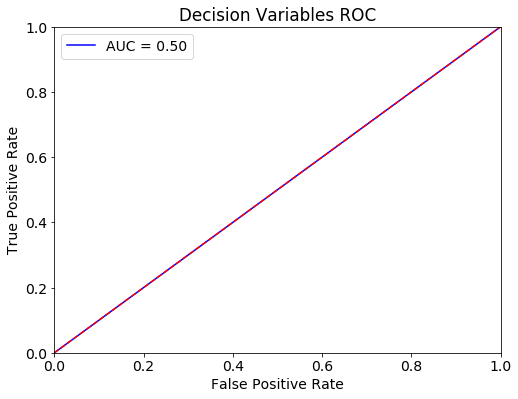

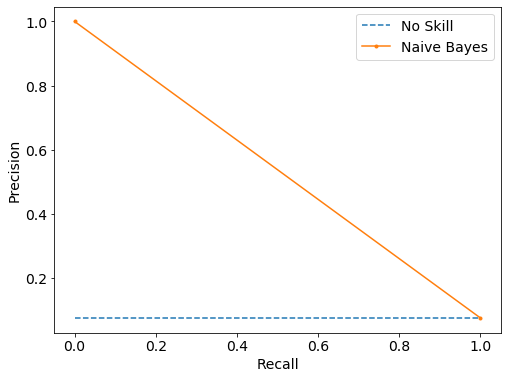

In [98]:
ROC1()